# **Vehicle Insurance Cross Sell Prediction**

# **Problem Statement**
---
Our client is an Insurance company that has provided Health Insurance to its customers now they need help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.
---

## Cross-selling
- Cross-selling is a sales technique involving the selling of an additional product or service to an existing customer.

- Upselling occurs when you increase a customer's value by encouraging them to add on services or purchase a more expensive model.

- Cross-selling For example, if you encourage a customer who just bought a new phone to get a protective case at the same time, that's a cross-selling win

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**
---

|Column Name | Description|
|------|------|
| id | Unique identifier for the Customer|
| Gender | Gender of the Customer |
| Driving_License | 0 for customer not having DL, 1 for customer having DL |
| Region_Code | Unique code for the region of the customer |
| Previously_Insured | 0 for customer not having vehicle insurance, 1 for customer having vehicle insurance |
| Vehicle_Age | Age of the vehicle |
| Vehicle_Damage | Customer got his/her vehicle damaged in the past. 0 for Customer didn't get his/her vehicle damaged in the past |
| Annual_Premium | The amount customer needs to pay as premium in the year |
| Policy_Sales_Channel |Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. |
| Vintage | Number of Days, Customer has been associated with the company. |
| Response (Dependent Feature) | 1 for Customer is interested, 0 for Customer is not interested |

# **Introduction**
---

Insurance is an agreement by which an individual obtains protection against any losses from an insurance company against the risks of damage, financial losses, damage, illness, or death in return for the payment of a specified premium. 

In this project, we have an insurance details dataset which contains a total of **381109 rows** and **12 features**. We have a categorical dependent variable *Response* which represents whether a customer is interested in vehicle insurance or not.

As an initial step, we checked for the null and duplicate values in our dataset. As there were no null and duplicate values present in our dataset, so data cleaning was not required. Further, we *normalized* the numerical columns for bringing them on the same scale.

In **Exploratory Data Analysis**, we categorized the Age as *YoungAge,* *MiddleAge, OldAge*.Then we categorized *Region_Code* and *Policy_Sales_Channel* to extract some valuable information from these features. We explored the independent features using some plots.

For **Feature selection**, we used Kendall's rank correlation coefficient for numerical features and for categorical features, we applied the Mutual Information technique.

For **Model prediction**, we used supervised machine learning algorithms like *Decision tree Classifier, AdaBoost, LightGBM, BaggingRegressor, NaiveBayes and Logistic regression*. Then applied hyperparameter tuning techniques to obtain better accuracy and to avoid overfitting.


# **Installing Dependencies**


---



In [ ]:
#@title Pip Install and Update Scikitlearn Library
!pip uninstall scikit-learn -y
!pip install -U scikit-learn 

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 37.3 MB/s eta 0:00:00


# **Importing Libraries**
---

In [ ]:
#@title Import required Libraries

# Basic
import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# other
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Reading Preprocessed Dataset**

### Following Preprocess steps Done...
- Data Cleaning
    - Outlier Treatment: Quantile method
    - Feature Scaling: MinMaxScalar 
- EDA
    - Exploring the Numerical Features
    - Converting Numerical Columns to Categorical
    - Gender Distribution
    - Exploring the Age Feature
    - Exploring Vehicle Damage
    - Exploring Vehicle Age Feature
    - Exploring Annual Premium
    - Annual Premium and Age
    - Age Group
    - Exploring Policy Sales Channel
    - Distribution Plots based on Features
    - Dropping Extra Columns
- Feature Selection
    - Numeric Feature Selection
    - Categorical Features
        - Mutual Information
    - One-Hot Encoding
- Save in CSV file




---

In [ ]:
#@title Load csv file 
data_url = "/content/drive/MyDrive/data_df.csv"
data_df = pd.read_csv(data_url)

In [ ]:
data_df.shape

(381109, 22)

In [ ]:
data_df.head()

,Response,Annual_Premium_Treated,Vintage_Treated,Gender_Female,Gender_Male,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,...,Age_Group_MiddleAge,Age_Group_OldAge,Age_Group_YoungAge,Policy_Sales_Channel_Categorical_Channel_A,Policy_Sales_Channel_Categorical_Channel_B,Policy_Sales_Channel_Categorical_Channel_C,Policy_Sales_Channel_Categorical_Channel_D,Region_Code_Categorical_Region_A,Region_Code_Categorical_Region_B,Region_Code_Categorical_Region_C
0,1,0.638245,0.716263,0,1,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1,0,0.521510,0.598616,0,1,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2,1,0.601797,0.058824,0,1,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
3,0,0.438540,0.667820,0,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
4,0,0.419591,0.100346,1,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0


In [ ]:
data_df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [ ]:
data_df['Response'].value_counts()/len(data_df)*100

0    87.743664
1    12.256336
Name: Response, dtype: float64

---

# **Machine Learning Algorithms**
---


Apply different Machine Learning Models to our data set and see how each of them performs. 

We will tune the hyper-parameters of those models and then we will compare and choose the best model among them, based on Elapsed Time and Evaluation Metrics of the best parameters. 

#### **Machine Learning Models** 

Follow we are going to train and evaluate our dataset:
- Decision Tree
- Gaussian Naive Bayes
- AdaBoost Classifier
- Bagging Classifier
- LightGBM
- Logistic Regression

### **Hyper-Parameter Tuning Methods**

Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models. These are tuned so that we could get good performance by the model.

Hyperparameter tuning aims to find such parameters where the performance of the model is highest or where the model performance is best and the error rate is least.

I have tried different hyper-parameter tuning methods. Every method gave the same result but **GridSearchCV** and **RandomizedSearchCV** took a huge amount of time to train the models. 

**HalvingRandomizedSearchCV** took the least time to train the models and predict the output. That's why here highly ***recommend*** to keep the Tuning_Method as Halving_Randomized_Search_CV from the drop-down menu below.

Scikit-learn version 0.24 came out along with two new classes for hyperparameter tuning: HalvingGridSearch and HalvingRandomSearchCV

Scikit-learned claimed that "they can be much faster at finding a good parameter combination"

HalvingGridSearch and HalvingRandomSearch take a different approach called successive halving. HalvingGridSearch (HGS),
HGS is like a competition among all candidates (hyperparameter combinations). In the first iteration, HGS trains all candidates on a small proportion of the training data. In the next iteration, only the candidates which performed best are chosen and they will be given more resources to compete. So, with each passing iteration, the ‘surviving’ candidates will be given more and more resources (training samples) until the best set of hyperparameters are left standing.

for class imbalance, we should adjust `scale_pos_weight` for XGBoost
scale_pos_weight = counts["No"] / counts["Yes"]


### **Tuning Methods:**
- HalvingRandomizedSearchCV: The Randomized search on hyper parameters search strategy starts evaluating candidates are sampled at random from the parameter space, with a small amount of resources and iteratively selects the best candidates, using more and more resources.

- GridSearchCV: in grid search we define the combinations and do training of the model.

- RandomizedSearchCV: the model selects the combinations randomly, If all parameters are presented as a list, sampling without replacement is performed.


### **Evaluation Metrics**
- Accuracy Score
    - Accuracy classification score: In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

    - Accuracy can be a useful measure if we have the same amount of samples per class but if we have an imbalanced set of samples accuracy isn't useful at all.
    
- Precision
    - Precision is a metric that quantifies the number of correct positive predictions made.
    - Precision, therefore, calculates the accuracy for the minority class.
    - In an imbalanced classification problem with two classes, precision is calculated as the number of true positives divided by the total number of true positives and false positives.
    - precision is simply the ratio of correct positive predictions out of all positive predictions made, or the accuracy of minority class predictions
- Recall
    - Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.
    - recall provides some notion of the coverage of the positive class.
    - imbalanced learning, recall is typically used to measure the coverage of the minority class.
    - In an imbalanced classification problem with two classes, recall is calculated as the number of true positives divided by the total number of true positives and false negatives.
- F1 Score
    - F-Measure provides a way to combine both precision and recall into a single measure that captures both properties.
- ROC AUC Score
    - ROC AUC compares the relation between True Positive Rate and False Positive Rate, while Accuracy is simply the percentage of correct predictions.
- Log Loss
    -  Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value.
    - For any given problem, a lower log loss value means better predictions.




### **Plots:**

At the end of every model's hyper-parameter tuning, there is one **ROC Curve** which shows the ROC Scores.


https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

In [ ]:
all_metrics_dict_list = []
def plot_confusion_matrix_and_roc_curves(model, X_test, y_test, y_pred):

    fig, axes = plt.subplots(1,2, figsize=(22,5))

    cm = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, ax = axes[0], annot=labels, fmt='',cmap='Blues')
    axes[0].set_title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight':'bold'})

    # predict probabilities
    pred_proba = model.predict_proba(X_test)

    # roc curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

    plt.subplot(1, 2, 2)
    # plot roc curves
    plt.plot(fpr, tpr,linestyle='--',color='red', label = type(model).__name__)

    plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
    # title
    plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
    # x label
    plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
    # y label
    plt.ylabel('True Positive rate', fontdict={'fontsize': 12})

    plt.legend(loc='best')
    plt.show()


def evaluation_metrics(name, independent_feature_length , y_pred, y_test, state):

    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    metrics_dict['Precision'] = [precision_score(y_test,y_pred)]      #Precision
    metrics_dict['Recall'] = [recall_score(y_test,y_pred)]            #Recall
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred)]              #F1 Score
    metrics_dict['ROC_AUC_Score'] = [roc_auc_score(y_test, y_pred)]   #ROC AUC Score
    metrics_dict['Log_Loss'] = [log_loss(y_test, y_pred)]             #Log Loss

    metrics_df = pd.DataFrame(metrics_dict)

    print(metrics_df)
    metrics_dict['Model_Name'] = state+str(name)                                # Model Name
    return metrics_dict


def hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model):

    if tuning_model == 'Halving_Randomized_Search_CV':
        tuned_model = HalvingRandomSearchCV(model, param_distributions = parameters, scoring = "accuracy", n_jobs=-1, factor=3, cv = 5 )
    
    elif tuning_model == 'Randomized_Search_CV':
        tuned_model = RandomizedSearchCV(model, param_distributions = parameters, scoring = 'accuracy', cv = 3, n_iter = 50, n_jobs=-1)

    else:
        tuned_mode = GridSearchCV(model, param_grid = parameters, scoring = 'accuracy', n_jobs=-1, cv = 3)

    print("Start Parameter Tuning process...")
    start_time = time.time() 
    
    tuned_model.fit(x_train, y_train)
    
    stop_time = time.time()

    print('*****'*10+f'\nBest Score for {type(model).__name__} : {tuned_model.best_score_}','\n---')
    print(f'Best Parameters for {type(model).__name__} : {tuned_model.best_params_}\n'+'-----'*10)

    print('Elapsed Time:',time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    print('======'*5)
    return tuned_model


def perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model):
    #print('-----'*10+f'\n{type(model).__name__}\n'+'-----'*10)

    model.fit(x_train, y_train)
    untuned_pred = model.predict(x_test)

    ## Evaluation Metrics before tuning
    print(f'\nEvaluation of {type(model).__name__} before tuning:\n'+'-----'*10)
    metrics_dict = evaluation_metrics(type(model).__name__, len(list(x_train.columns)), untuned_pred, y_test, state='BeforeTuning_')
    all_metrics_dict_list.append(metrics_dict)
    print()

    plot_confusion_matrix_and_roc_curves(model, x_test, y_test, untuned_pred)

    ## Hyper-parameter tuning
    tuned_model = hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model)
    print()
    tuned_pred = tuned_model.predict(x_test)
  
    ## Evaluation Metrics after tuning
    print(f'\nEvaluation of {type(model).__name__} after tuning:\n'+'-----'*10)
    metrics_dict = evaluation_metrics(type(model).__name__,len(list(x_train.columns)), tuned_pred, y_test, state='AfterTuning_')
    all_metrics_dict_list.append(metrics_dict)
    print()

    plot_confusion_matrix_and_roc_curves(tuned_model.best_estimator_, x_test, y_test, tuned_pred)


def ml_algorithm_implementation(df, model, parameters, tuning_model, feature_importance = False):

    if feature_importance == False:
        print('########'*8+'\n     <<<<=== '+f'ML Model: {type(model).__name__}'+' ===>>>>\n'+'\n     <<<<=== '+f'Tuning Model: {tuning_model}'+' ===>>>>\n'+'********'*8)

    x = data_df.iloc[:,1:]
    y = data_df['Response']

    # Train Test Split             
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=57)

    if feature_importance == True:
        model.fit(x_train, y_train)
        return x_train, y_train, model

    perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model)


def create_Matrics_df(all_metrics_dict_list ):
    d1 = pd.DataFrame(all_metrics_dict_list)
    d1['Accuracy_Score'] = d1['Accuracy_Score'].apply(lambda x: round(x[0],2))
    d1['Precision'] = d1['Precision'].apply(lambda x: round(x[0],2))
    d1['Recall'] = d1['Recall'].apply(lambda x: round(x[0],2))
    d1['F1_Score'] = d1['F1_Score'].apply(lambda x: round(x[0],2))
    d1['ROC_AUC_Score'] = d1['ROC_AUC_Score'].apply(lambda x: round(x[0],2))
    d1['Log_Loss'] = d1['Log_Loss'].apply(lambda x: round(x[0],2))
    d1 = d1[['Model_Name', 'Accuracy_Score', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC_Score', 'Log_Loss']]
    return d1

In [ ]:


#@title Select Parameter Tuning Method <br> Keep it 'Halving_Randomized_Search_CV' <br>Other methods are time consuming.
Tuning_Method = "Halving_Randomized_Search_CV" #@param ["Halving_Randomized_Search_CV", "Grid_Search_CV", "Randomized_Search_CV"]



In [ ]:
print("Selected Tuning Method ", Tuning_Method)

Selected Tuning Method  Halving_Randomized_Search_CV


In [ ]:
data_df.sample(5)

,Response,Annual_Premium_Treated,Vintage_Treated,Gender_Female,Gender_Male,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,...,Age_Group_MiddleAge,Age_Group_OldAge,Age_Group_YoungAge,Policy_Sales_Channel_Categorical_Channel_A,Policy_Sales_Channel_Categorical_Channel_B,Policy_Sales_Channel_Categorical_Channel_C,Policy_Sales_Channel_Categorical_Channel_D,Region_Code_Categorical_Region_A,Region_Code_Categorical_Region_B,Region_Code_Categorical_Region_C
157908,0,0.486918,0.875433,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
364547,0,0.436414,0.934256,0,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
288039,0,0.411964,0.017301,1,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
267757,0,0.351301,0.972318,1,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
165201,0,0.535263,0.446367,0,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1


## **Decision Tree**
---
Decision tree is the most powerful and popular tool for *classification* and *Regression*. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

### ***Hyper-Parameter Tuning:***

> **splitter:** The strategy used to choose the split at each node.

> **max_depth:** The maximum depth of the tree.

> **min_samples_leaf:** The minimum number of samples required to be at a leaf node.

> **min_weight_fraction_leaf:** The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.

> **max_features:** The number of features to consider when looking for the best split.

> **max_leaf_nodes:** Grow a tree with max_leaf_nodes in best-first fashion.

> **random_state:** Controls the randomness of the estimator.


################################################################
     <<<<=== ML Model: DecisionTreeClassifier ===>>>>

     <<<<=== Tuning Model: Halving_Randomized_Search_CV ===>>>>
****************************************************************

Evaluation of DecisionTreeClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.824766   0.276925  0.272094  0.274489       0.586766  6.316064



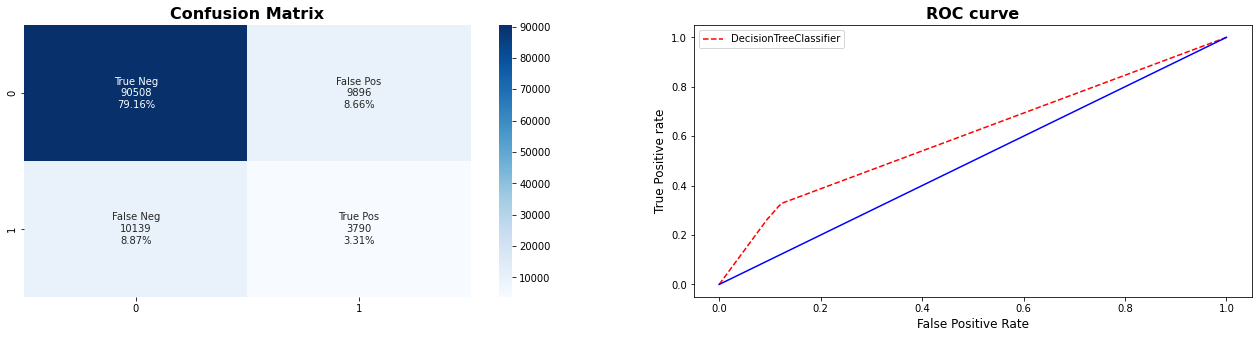

Start Parameter Tuning process...
**************************************************
Best Score for DecisionTreeClassifier : 0.8762803828122872 
---
Best Parameters for DecisionTreeClassifier : {'splitter': 'random', 'random_state': 23, 'min_weight_fraction_leaf': 0.3, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': 7}
--------------------------------------------------
Elapsed Time: 00:05:03


Evaluation of DecisionTreeClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.391139



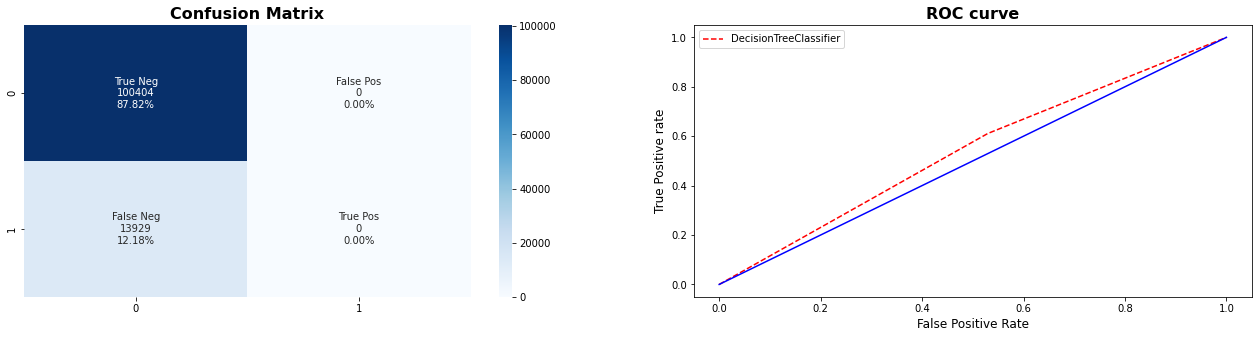

In [ ]:
parameters_decision_tree = {"splitter":["best","random"],
            "max_depth" : [None,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.0, 0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,30,40,50,60], 
           'random_state':[23]}

ml_algorithm_implementation(data_df, DecisionTreeClassifier(), parameters_decision_tree, Tuning_Method, False)

In [ ]:
dt_df = create_Matrics_df(all_metrics_dict_list )
dt_df

,Model_Name,Accuracy_Score,Precision,Recall,F1_Score,ROC_AUC_Score,Log_Loss
0,BeforeTuning_DecisionTreeClassifier,0.82,0.28,0.27,0.27,0.59,6.32
1,AfterTuning_DecisionTreeClassifier,0.88,0.00,0.00,0.00,0.50,4.39


### Conclusion for Decision Tree:
#### Before Tuning DecisionTreeClassifier Accuracy is 82% and after Tuning accuracy is increases upto 87%. But  TP = 0, the Precision and Recall both become 0, and F1-score cannot be calculated (division by 0). Such cases can be scored as F1-score = 0, or generally marking the classifier as useless. Because the classifier cannot predict any correct positive result.

---

## **Gaussian Naive Bayes**
---
Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes theorem. It is a simple classification technique, but has high functionality.

### ***Hyper-Parameter Tuning:***

> **var_smoothing:** Portion of the largest variance of all features that is added to variances for calculation stability.

################################################################
     <<<<=== ML Model: GaussianNB ===>>>>

     <<<<=== Tuning Model: Halving_Randomized_Search_CV ===>>>>
****************************************************************

Evaluation of GaussianNB before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.687571   0.268878  0.910044   0.41511       0.783375   11.2611



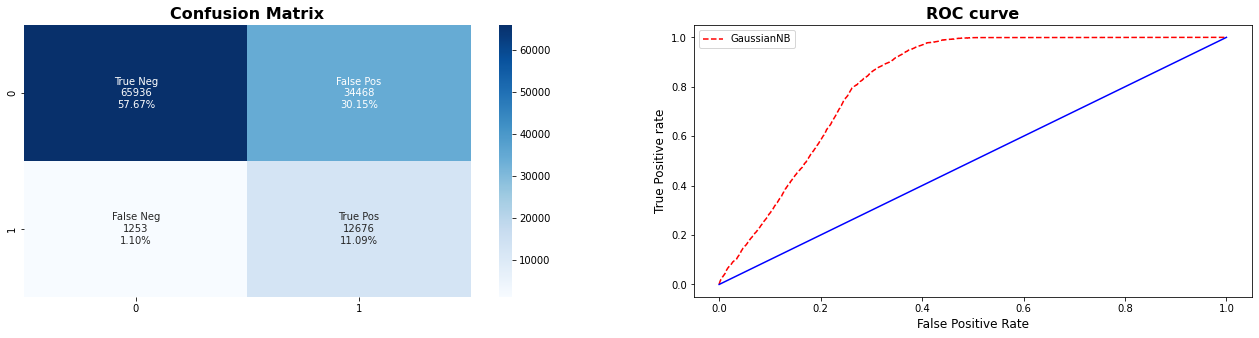

Start Parameter Tuning process...
**************************************************
Best Score for GaussianNB : 0.7171960402094562 
---
Best Parameters for GaussianNB : {'var_smoothing': 1.0}
--------------------------------------------------
Elapsed Time: 00:00:06


Evaluation of GaussianNB after tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score   Log_Loss
0        0.720711   0.283529  0.846435  0.424773       0.774852  10.066612



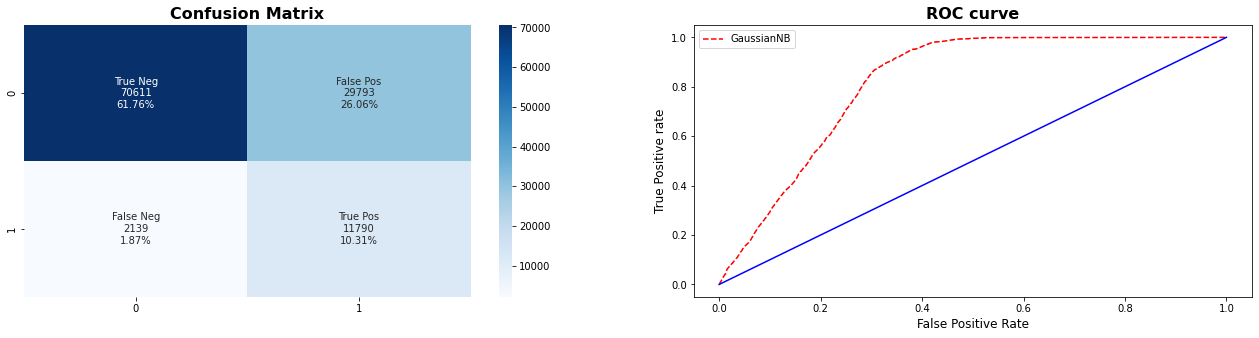

In [ ]:
parameters_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

ml_algorithm_implementation(data_df, GaussianNB(), parameters_NB, Tuning_Method, False)

In [ ]:
gnb_df = create_Matrics_df(all_metrics_dict_list )
gnb_df.iloc[-2:,:]

,Model_Name,Accuracy_Score,Precision,Recall,F1_Score,ROC_AUC_Score,Log_Loss
2,BeforeTuning_GaussianNB,0.69,0.27,0.91,0.42,0.78,11.26
3,AfterTuning_GaussianNB,0.72,0.28,0.85,0.42,0.77,10.07


### Conclusion for GaussianNB:
#### Before Tuning GaussianNB Classifier Accuracy is improved after Parameter tuning. But  F1_score and ROC_AUC score is not improved. Such model Log_loss is very large so GaussianNB is not good model for prediction on our data.

---

## **AdaBoost Classifier**
---
AdaBoost algorithm, short for *Adaptive Boosting*, is a *Boosting* technique used as an *Ensemble Method* in Machine Learning. It is called *Adaptive Boosting* as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances.

### ***Hyper-Parameter Tuning:***

> **n_estimators:** The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

> **learning_rate:** Weight applied to each classifier at each boosting iteration.

> **random_state:** Controls the randomness of the estimator.


################################################################
     <<<<=== ML Model: AdaBoostClassifier ===>>>>

     <<<<=== Tuning Model: Halving_Randomized_Search_CV ===>>>>
****************************************************************

Evaluation of AdaBoostClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.391139



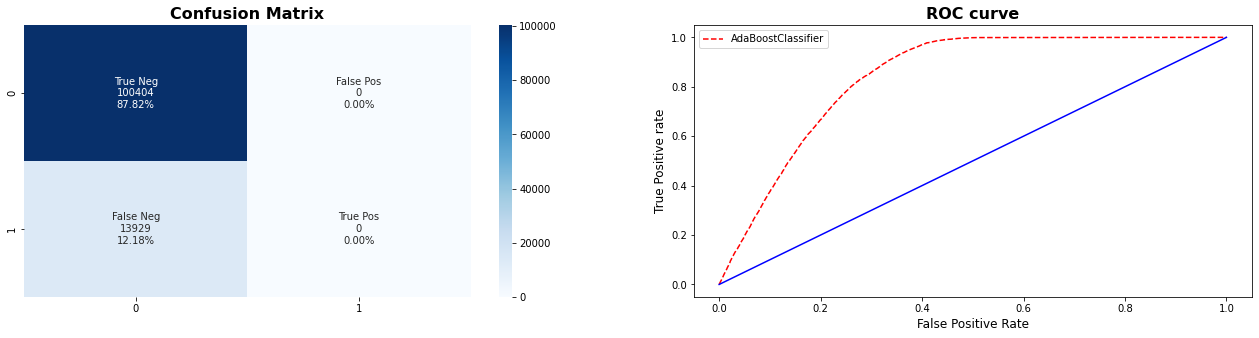

Start Parameter Tuning process...
**************************************************
Best Score for AdaBoostClassifier : 0.8519047619047619 
---
Best Parameters for AdaBoostClassifier : {'random_state': 2, 'n_estimators': 200, 'learning_rate': 0.001}
--------------------------------------------------
Elapsed Time: 00:01:37


Evaluation of AdaBoostClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.391139



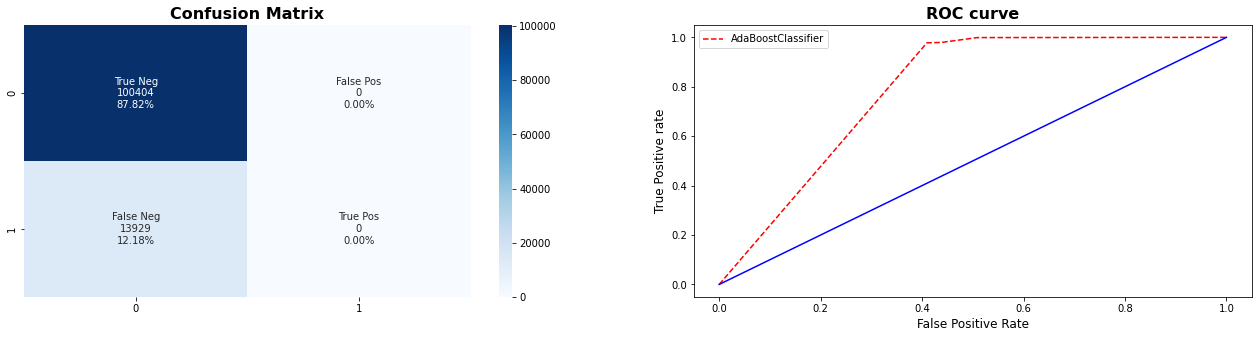

In [ ]:
parameters_ada = {'n_estimators':[10, 100, 200,400],
              'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.5],
              'random_state':[2]}

ml_algorithm_implementation(data_df, AdaBoostClassifier(), parameters_ada, Tuning_Method, False)

In [ ]:
adb_df = create_Matrics_df(all_metrics_dict_list )
adb_df.iloc[-2:,:]

,Model_Name,Accuracy_Score,Precision,Recall,F1_Score,ROC_AUC_Score,Log_Loss
4,BeforeTuning_AdaBoostClassifier,0.88,0.0,0.0,0.0,0.5,4.39
5,AfterTuning_AdaBoostClassifier,0.88,0.0,0.0,0.0,0.5,4.39


### Conclusion for AdaBoostClassifier:
#### Before Tuning AdaBoostClassifier Classifier Accuracy is 88%. But  TP = 0, the Precision and Recall both become 0, and F1-score cannot be calculated (division by 0). Such cases can be scored as F1-score = 0, or generally marking the classifier as useless. Because the classifier cannot predict any correct positive result.

---

## **Bagging Classifier**
---
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

### ***Hyper-Parameter Tuning:***

> **n_estimators:** The maximum number of estimators at which boosting is terminated.

> **random_state:** Controls the randomness of the estimator.


################################################################
     <<<<=== ML Model: BaggingClassifier ===>>>>

     <<<<=== Tuning Model: Halving_Randomized_Search_CV ===>>>>
****************************************************************

Evaluation of BaggingClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.853454   0.303094  0.156149  0.206112        0.55317  5.282039



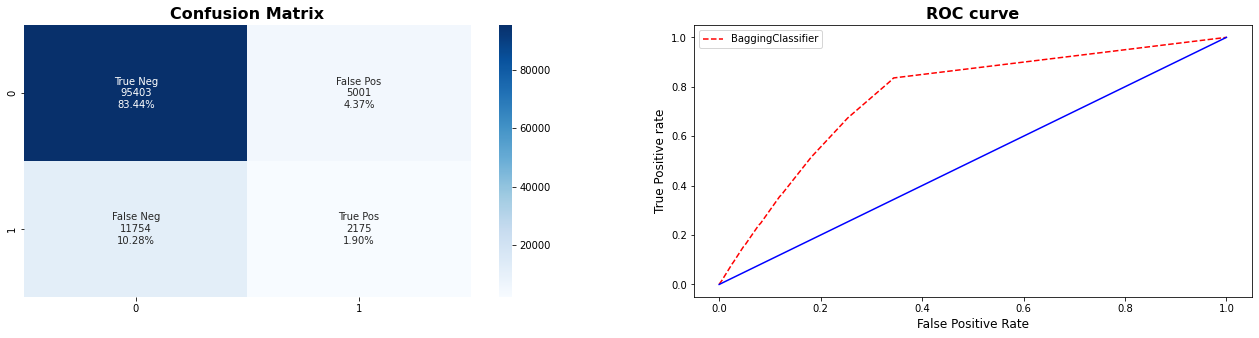

Start Parameter Tuning process...
**************************************************
Best Score for BaggingClassifier : 0.7303030303030302 
---
Best Parameters for BaggingClassifier : {'random_state': 26, 'n_estimators': 400}
--------------------------------------------------
Elapsed Time: 00:08:43


Evaluation of BaggingClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.855746   0.312463  0.153349  0.205731       0.553269  5.199444



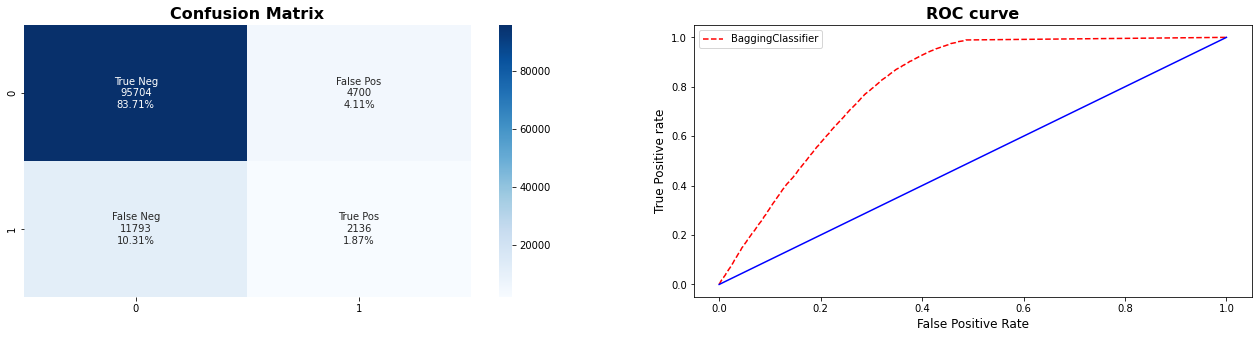

In [ ]:
parameters_bagging = {'n_estimators':[10, 100, 200, 400], 
                      'random_state':[26]}

ml_algorithm_implementation(data_df, BaggingClassifier(), parameters_bagging, Tuning_Method, False)

In [ ]:
bc_df = create_Matrics_df(all_metrics_dict_list )
bc_df.iloc[-2:,:]

,Model_Name,Accuracy_Score,Precision,Recall,F1_Score,ROC_AUC_Score,Log_Loss
6,BeforeTuning_BaggingClassifier,0.85,0.30,0.16,0.21,0.55,5.28
7,AfterTuning_BaggingClassifier,0.86,0.31,0.15,0.21,0.55,5.20


### Conclusion for BaggingClassifier:
#### Before Tuning BaggingClassifier Accuracy is 85% and after Tuning accuracy is increases upto 86%. The Precision 0.31 and Recall 0.15 and F1-score 0.21. ROC_AUC score is not not but much fine. 

---

## **LightGBM Classifier**
---
LightGBM, short for Light Gradient Boosting Machine, is a *distributed gradient boosting framework*.It uses Histogram based splitting, Gradient-based One-Side Sampling (GOSS) ans Exclusive Feature Bundling (EFB) making it a fast algorithm.

### ***Hyper-Parameter Tuning:***

> **n_estimators:** Number of Boosting iterations.

> **learning_rate:** This setting is used for reducing the gradient step. It affects the overall time of training: the smaller the value, the more iterations are required for training.

> **min_data_in_leaf:** Minimal number of data in one leaf. Can be used to deal with over-fitting

> **random_state:** Controls the randomness of the estimator.


################################################################
     <<<<=== ML Model: LGBMClassifier ===>>>>

     <<<<=== Tuning Model: Halving_Randomized_Search_CV ===>>>>
****************************************************************

Evaluation of LGBMClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision   Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878163   0.485714  0.00122  0.002435       0.500521  4.391454



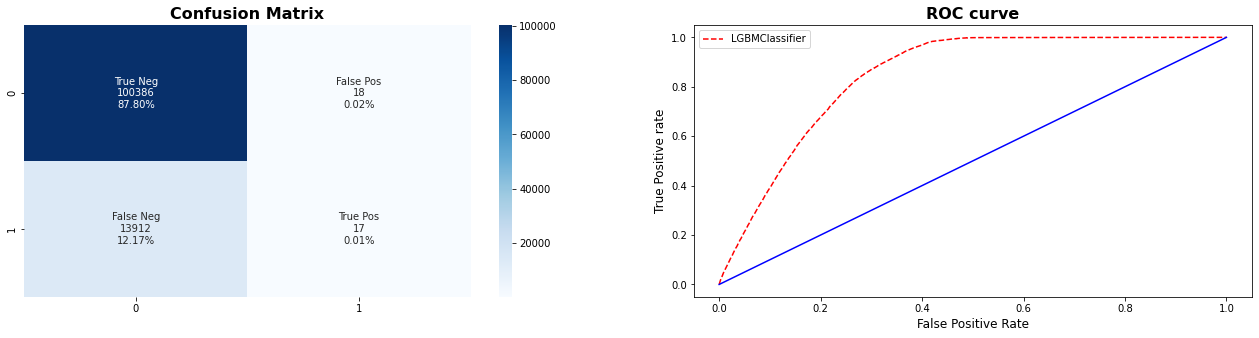

Start Parameter Tuning process...
[LightGBM] [Warning] Unknown parameter: max_depths
[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250
**************************************************
Best Score for LGBMClassifier : 0.8790476156863297 
---
Best Parameters for LGBMClassifier : {'n_estimators': 100, 'min_data_in_leaf': 250, 'max_depths': 3.0, 'learning_rate': 0.001}
--------------------------------------------------
Elapsed Time: 00:03:03


Evaluation of LGBMClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.391139



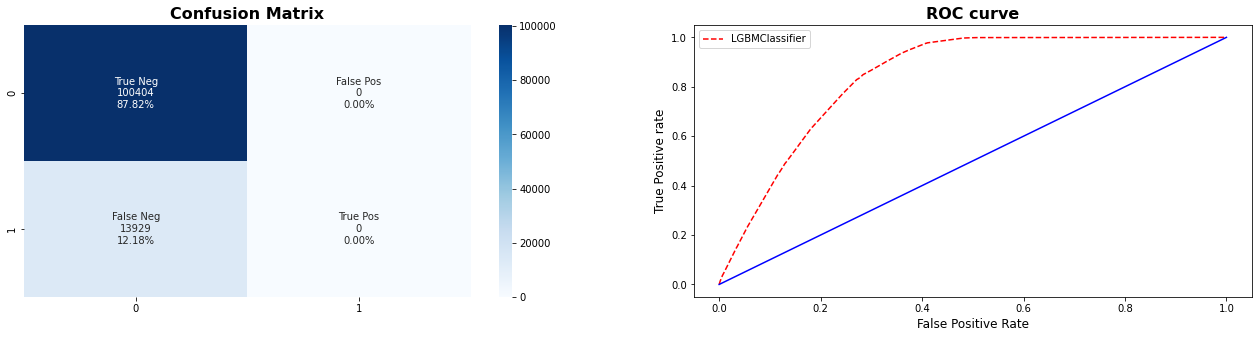

In [ ]:
parameters_lightgbm = {
    'max_depths': np.linspace(1, 32, 32, endpoint=True),
    'min_data_in_leaf':[100, 200, 250, 300],
    'n_estimators':[50,100, 120,150,200],
    'learning_rate':[.001,0.01,.1]
}

ml_algorithm_implementation(data_df, lgb.LGBMClassifier(), parameters_lightgbm, Tuning_Method, False)

In [ ]:
lgb_df = create_Matrics_df(all_metrics_dict_list )
lgb_df.iloc[-2:,:]

,Model_Name,Accuracy_Score,Precision,Recall,F1_Score,ROC_AUC_Score,Log_Loss
8,BeforeTuning_LGBMClassifier,0.88,0.49,0.0,0.0,0.5,4.39
9,AfterTuning_LGBMClassifier,0.88,0.00,0.0,0.0,0.5,4.39


### Conclusion for LGBMClassifier:
#### Before Tuning LGBM Classifier Accuracy is 88%. But  TP = 0, the Precision and Recall both become 0, and F1-score cannot be calculated (division by 0). Such cases can be scored as F1-score = 0, or generally marking the classifier as useless. Because the classifier cannot predict any correct positive result.

---

## **Logistic Regression**
---
The logistic classification model is a binary classification model in which the conditional probability of one of the two possible realizations of the output variable is assumed to be equal to a linear combination of the input variables, transformed by the logistic function.

### ***Hyper-Parameter Tuning:***

> **solver:** Algorithm to use in the optimization problem.

> **penalty:** Specify the norm of the penalty.

> **C:** Inverse of regularization strength

> **random_state:** Controls the randomness of the estimator.


################################################################
     <<<<=== ML Model: LogisticRegression ===>>>>

     <<<<=== Tuning Model: Halving_Randomized_Search_CV ===>>>>
****************************************************************

Evaluation of LogisticRegression before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.391139



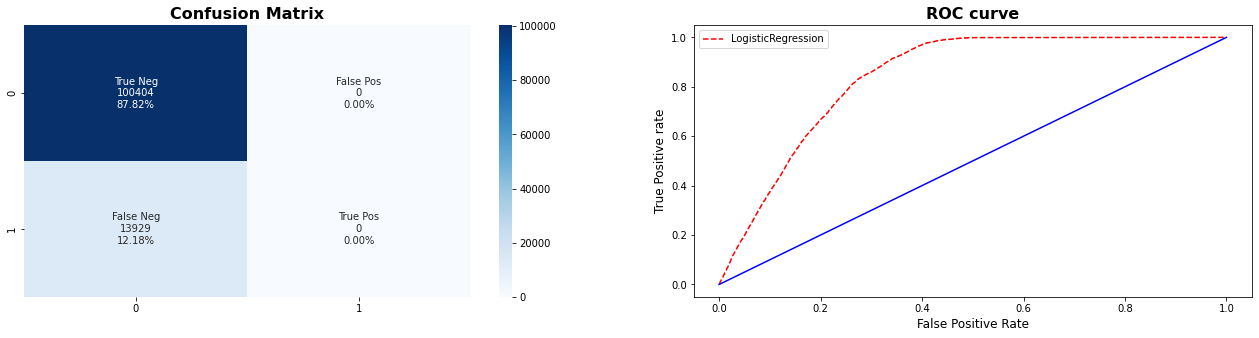

Start Parameter Tuning process...
**************************************************
Best Score for LogisticRegression : 0.8469539633091034 
---
Best Parameters for LogisticRegression : {'solver': 'sag', 'random_state': 2, 'penalty': 'l2', 'C': 0.001}
--------------------------------------------------
Elapsed Time: 00:00:07


Evaluation of LogisticRegression after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.391139



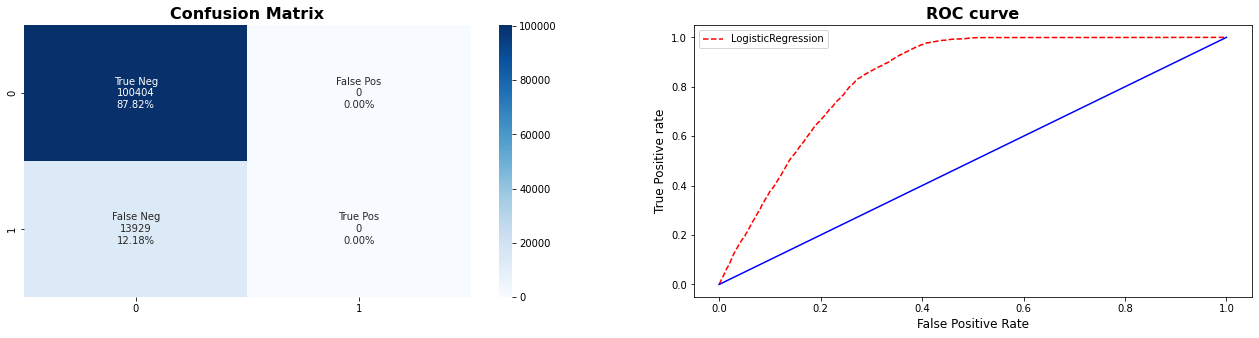

In [ ]:
parameters_logistic = {'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
                        'penalty' : ['l2'],
                        'C' : [100, 10, 1.0, 0.1, 0.01, 0.001], 
                       'random_state':[2]}

ml_algorithm_implementation(data_df, LogisticRegression(), parameters_logistic, Tuning_Method, False)

In [ ]:
lr_df = create_Matrics_df(all_metrics_dict_list )
lr_df.iloc[-2:,:]

,Model_Name,Accuracy_Score,Precision,Recall,F1_Score,ROC_AUC_Score,Log_Loss
10,BeforeTuning_LogisticRegression,0.88,0.0,0.0,0.0,0.5,4.39
11,AfterTuning_LogisticRegression,0.88,0.0,0.0,0.0,0.5,4.39


### Conclusion for LogisticRegression:
#### Before Tuning LogisticRegression Classifier Accuracy is 88%. But  TP = 0, the Precision and Recall both become 0, and F1-score cannot be calculated (division by 0). Such cases can be scored as F1-score = 0, or generally marking the classifier as useless. Because the classifier cannot predict any correct positive result.

---


In [ ]:
all_df = create_Matrics_df(all_metrics_dict_list )
all_df

,Model_Name,Accuracy_Score,Precision,Recall,F1_Score,ROC_AUC_Score,Log_Loss
0,BeforeTuning_DecisionTreeClassifier,0.82,0.28,0.27,0.27,0.59,6.32
1,AfterTuning_DecisionTreeClassifier,0.88,0.00,0.00,0.00,0.50,4.39
2,BeforeTuning_GaussianNB,0.69,0.27,0.91,0.42,0.78,11.26
3,AfterTuning_GaussianNB,0.72,0.28,0.85,0.42,0.77,10.07
4,BeforeTuning_AdaBoostClassifier,0.88,0.00,0.00,0.00,0.50,4.39
5,AfterTuning_AdaBoostClassifier,0.88,0.00,0.00,0.00,0.50,4.39
6,BeforeTuning_BaggingClassifier,0.85,0.30,0.16,0.21,0.55,5.28
7,AfterTuning_BaggingClassifier,0.86,0.31,0.15,0.21,0.55,5.20
8,BeforeTuning_LGBMClassifier,0.88,0.49,0.00,0.00,0.50,4.39
9,AfterTuning_LGBMClassifier,0.88,0.00,0.00,0.00,0.50,4.39


In [ ]:
all_df[all_df['Log_Loss']== min( all_df[all_df['ROC_AUC_Score']>0.50]['Log_Loss'] )]

,Model_Name,Accuracy_Score,Precision,Recall,F1_Score,ROC_AUC_Score,Log_Loss
7,AfterTuning_BaggingClassifier,0.86,0.31,0.15,0.21,0.55,5.2


## **Best Model with Precision, Recall and F1-score**

In problem, we have to find those customers only who are interested for taking next (Vehicle) Insurance. so we can targeted those customers only for markiting...

so here we focus on the correctly Predicted Positive value,
(What proportion of Correctly Positive Predicted by the Actual Positive)...

Means we can check our model has High Recall score.
(Actual number of customer who are interested in take Insurance, what number of customers predicted Positive by ML model who are intersted....)

So Highest Recall at Before tuning GaussianNB Classifier, But After tuning classifier Accuracy increases and Log_loss decreases.

### Precision

Our stackholder is interested in All the Customers who might be interested in taking Insurance Predicted by ML model. means taking some risk bases on we can Use Precision as evalution matrix in this stage.

### F1-score

If Both (Precision And Recall) Equal Important for model evaluation, then can use F1-score, which gives Harmonic mean of Precision and Recall.


## GaussianNB Classifier is the Best model, F1-score is 0.42 

## In next Notebook I will Balance Data and check ML model performance....



# **F1-score**

Precision and recall measure the two types of errors that could be made for the positive class.

Maximizing precision minimizes false positives and maximizing recall minimizes false negatives.

F-Measure or F-Score provides a way to combine both precision and recall into a single measure that captures both properties.

The intuition for F-measure is that both measures Precision and Recall are balanced in importance then we use F1-score.

## Fbeta-Measure:
where the balance of precision and recall in the calculation of the harmonic mean is controlled by a coefficient called beta.


- F-measure with more attention put on Precision, such as when false Positive are more important to minimize,
- F-measure with more attention put on recall, such as when false negatives are more important to minimize,

- F0.5-Measure (beta=0.5): More weight on precision, less weight on recall.
- F1-Measure (beta=1.0): Equal Importance on precision and recall.
- F2-Measure (beta=2.0): More weight on recall

## **Best Model old intuation.....**
---
From all the above models that we tried to train and predict the output, we can conclude that ***Bagging Classifier*** is the best model for our data set. The best parameter of this model is {'n_estimators': 400}. Its Accuracy Score is 0.86, Precision is 0.31, Recall is 0.15, F1_Score is 0.21, ROC_AUC_Score is 0.55 and Log_Loss is 5.2.

The more the predicted probability diverges from the actual value, the higher is the log-loss value. The lower log loss value means better predictions.

Log Loss is similar to the Accuracy, but it will favor models that distinguish more strongly the classes. Log Loss it useful to compare models not only on their output but on their probabilistic outcome.

In general, minimising Log Loss gives greater accuracy for the classifier.

We can see that we have other models with higher Accuracy Score than *Bagging Classifier*. But the `problem with those models is, their Precision and Recall values are zero which means True Positives are zero.` 

`That means those models are unable to predict correct output if any customer is ready to take vehicle insurance.` 

And as we all know, classification accuracy alone can be misleading if you have an unequal number of observations in each class (Imbalance Data). This is exactly the case with our data set.

*Hence, **Bagging Classifier** is the **best model** for our data set.*

This ROC curve has an AUC of 0.5, meaning it ranks a random positive example higher than a random negative example 50% of the time. As such, the corresponding classification model is basically worthless, as its predictive ability is no better than random guessing.

When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. Meaning that the classifier either predicts a random class or a constant class for all the data points.

# **Extracting Feature Importance**
---

We got our best model with its hyper-parameter values. Let's have a look at the feature importance of our data set.

In [ ]:
x_train, y_train, model = ml_algorithm_implementation(data_df, BaggingClassifier(n_estimators=400, random_state=23), 
                                None, None, True)

In [ ]:
importances = np.mean([
                            tree.feature_importances_ for tree in model.estimators_
                            ], axis=0)

In [ ]:
importances

array([0.36810711, 0.32993176, 0.01745579, 0.01753814, 0.00692251,
       0.00685523, 0.00576569, 0.01466724, 0.00553024, 0.06924625,
       0.06388141, 0.00182384, 0.00833882, 0.00198025, 0.00537353,
       0.00654347, 0.01348724, 0.01204266, 0.01482886, 0.01514966,
       0.01453031])

In [ ]:
indices = np.argsort(importances)[::-1]
indices[:5]

array([ 0,  1,  9, 10,  3])

In [ ]:
x_train.columns.values[indices[:5]]

array(['Annual_Premium_Treated', 'Vintage_Treated', 'Vehicle_Damage_No',
       'Vehicle_Damage_Yes', 'Gender_Male'], dtype=object)

In [ ]:
importances[indices][:5]

array([0.36810711, 0.32993176, 0.06924625, 0.06388141, 0.01753814])

In [ ]:
sum(importances[indices[:5]])

0.8487046696012113

In [ ]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.2, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()

def show_feature_importance():
    x_train, y_train, model = ml_algorithm_implementation(data_df, BaggingClassifier(n_estimators=400, random_state=23), 
                                None, None, True)
    
    importances = np.mean([
                            tree.feature_importances_ for tree in model.estimators_
                            ], axis=0)
    feature_plot(importances, x_train, y_train)

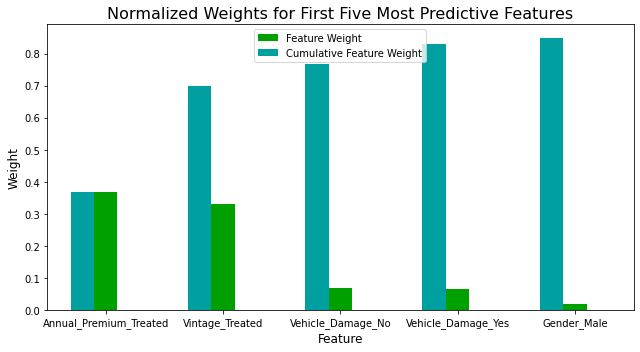

In [ ]:
show_feature_importance()

**Observations:**
- Annual_Premium_Treated has impacted the most in the prediction.
- Gender_Male has highest feature weight but less cumulative weight.

# **Conclusion**
---

Starting from loading our dataset, we initially checked for null values and duplicates. There were no null values and duplicates so treatment of such was not required. Before data processing, we applied feature scaling techniques to normalize our data to bring all features on the same scale and make it easier to process by ML algorithms.

Through **Exploratory Data Analysis**, we categorized *Age* as YoungAge, MiddleAge, and OldAge, then we categorized the *Region_Code* as Region_A, Region_B, Region_C. We categorized the *Policy_Sales_Channel* into channel_A, channel_B, channel_C. Further, we observed that customers belonging to youngAge are more interested in vehicle response. We observed that customers having vehicles older than 2 years are more likely to be interested in vehicle insurance. Similarly, customers having  damaged vehicles are more likely to be interested in vehicle insurance.

For **Feature Selection**, we used Kendall's rank correlation coefficient for numerical features and for categorical features, we applied the Mutual Information technique. Here we observed that Previously_Insured is the most important feature and has the highest impact on the dependent feature and there is no correlation between the two numeric features

Further, we applied **Machine Learning Algorithms** to determine whether a customer would be interested in Vehicle Insurance. For the *Naive Bayes* algorithm, we got an accuracy score of 68% and after hyperparameter tuning, the accuracy score increased to 72%. Similarly, for *Decision Tree Classifier, AdaBoost, BaggingClassifier, LightGBM* accuracy score was obtained around 82%-87%. 

So, we selected our ***best model*** as the model with an accuracy score of ***85%*** considering precision and recall as we have an unequal number of observations in each class in our dataset, so accuracy alone can be misleading.



# Hyperparameter with other scoring method


## Check HalvingRandomizedSearchCV Hyperparameter technique with other scoring method

- accuracy: Accuracy classification score, In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

- balanced_accuracy: The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.

- precision: The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

- roc_auc: ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate. The curve information is summarized in one number

- f1: The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
F1 = 2 * (precision * recall) / (precision + recall)

- f1_macro:  if you valued the minority class the most important, you should switch to a macro-averaged score. This metric is insensitive to the imbalance of the classes and treats them all as equal. 
(macro-average is not biased towards any of the two classes, still it's uselessly complex, it makes it harder to understand what's going on than simple performance on the positive class, which is normally the minority one) and
(Use micro-averaging to weight your metric towards the largest one.)

[Scikitlearn model_evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring)

---

In [ ]:
Tuning_Method = "Halving_Randomized_Search_CV"

In [ ]:
all_metrics_dict_list = []
def plot_confusion_matrix_and_roc_curves(model, X_test, y_test, y_pred):

    fig, axes = plt.subplots(1,2, figsize=(22,5))

    cm = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, ax = axes[0], annot=labels, fmt='',cmap='Blues')
    axes[0].set_title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight':'bold'})

    # predict probabilities
    pred_proba = model.predict_proba(X_test)

    # roc curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

    plt.subplot(1, 2, 2)
    # plot roc curves
    plt.plot(fpr, tpr,linestyle='--',color='red', label = type(model).__name__)

    plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
    # title
    plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
    # x label
    plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
    # y label
    plt.ylabel('True Positive rate', fontdict={'fontsize': 12})

    plt.legend(loc='best')
    plt.show()


def evaluation_metrics(name, independent_feature_length , y_pred, y_test, state):

    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    metrics_dict['Precision'] = [precision_score(y_test,y_pred)]      #Precision
    metrics_dict['Recall'] = [recall_score(y_test,y_pred)]            #Recall
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred)]              #F1 Score
    metrics_dict['ROC_AUC_Score'] = [roc_auc_score(y_test, y_pred)]   #ROC AUC Score
    metrics_dict['Log_Loss'] = [log_loss(y_test, y_pred)]             #Log Loss

    metrics_df = pd.DataFrame(metrics_dict)

    print(metrics_df)
    metrics_dict['Model_Name'] = state+str(name)                                # Model Name
    return metrics_dict


def hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model, hpm_scr):

    if tuning_model == 'Halving_Randomized_Search_CV':
        tuned_model = HalvingRandomSearchCV(model, param_distributions = parameters, scoring = hpm_scr, n_jobs=-1, factor=3, cv = 5 )
    
    elif tuning_model == 'Randomized_Search_CV':
        tuned_model = RandomizedSearchCV(model, param_distributions = parameters, scoring = hpm_scr, cv = 3, n_iter = 50, n_jobs=-1)

    else:
        tuned_mode = GridSearchCV(model, param_grid = parameters, scoring = hpm_scr, n_jobs=-1, cv = 3)

    print("Start Parameter Tuning process...")
    start_time = time.time() 
    
    tuned_model.fit(x_train, y_train)
    
    stop_time = time.time()

    print('*****'*10+f'\nBest Score for {type(model).__name__} : {tuned_model.best_score_}','\n---')
    print(f'Best Parameters for {type(model).__name__} : {tuned_model.best_params_}\n'+'-----'*10)

    print('Elapsed Time:',time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    print('======'*5)
    return tuned_model


def perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model, hpm_scr):
    #print('-----'*10+f'\n{type(model).__name__}\n'+'-----'*10)

    model.fit(x_train, y_train)
    untuned_pred = model.predict(x_test)

    ## Evaluation Metrics before tuning
    print(f'\nEvaluation of {type(model).__name__} before tuning:\n'+'-----'*10)
    metrics_dict = evaluation_metrics(type(model).__name__, len(list(x_train.columns)), untuned_pred, y_test, state='BeforeTuning_')
    metrics_dict['HyperParameter_scoring']='BeforeTuning'
    all_metrics_dict_list.append(metrics_dict)
    print()

    plot_confusion_matrix_and_roc_curves(model, x_test, y_test, untuned_pred)

    ## Hyper-parameter tuning
    tuned_model = hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model, hpm_scr)
    print()
    tuned_pred = tuned_model.predict(x_test)
  
    ## Evaluation Metrics after tuning
    print(f'\nEvaluation of {type(model).__name__} after tuning:\n'+'-----'*10)
    metrics_dict = evaluation_metrics(type(model).__name__,len(list(x_train.columns)), tuned_pred, y_test, state='AfterTuning_')
    metrics_dict['HyperParameter_scoring']=hpm_scr
    all_metrics_dict_list.append(metrics_dict)
    print()

    plot_confusion_matrix_and_roc_curves(tuned_model.best_estimator_, x_test, y_test, tuned_pred)


def ml_algorithm_implementation(df, model, parameters, tuning_model, feature_importance = False, hpm_scr='accuracy'):

    if feature_importance == False:
        print('########'*8+'\n     <<<<=== '+f'ML Model: {type(model).__name__}'+' ===>>>>\n'+'\n     <<<<=== '+f'Tuning Model: {tuning_model}'+' ===>>>>\n'+'********'*8)

    x = data_df.iloc[:,1:]
    y = data_df['Response']

    # Train Test Split             
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=57)

    if feature_importance == True:
        model.fit(x_train, y_train)
        return x_train, y_train, model

    perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model, hpm_scr)


def create_Matrics_df(all_metrics_dict_list ):
    d1 = pd.DataFrame(all_metrics_dict_list)
    d1['Accuracy_Score'] = d1['Accuracy_Score'].apply(lambda x: round(x[0],2))
    d1['Precision'] = d1['Precision'].apply(lambda x: round(x[0],2))
    d1['Recall'] = d1['Recall'].apply(lambda x: round(x[0],2))
    d1['F1_Score'] = d1['F1_Score'].apply(lambda x: round(x[0],2))
    d1['ROC_AUC_Score'] = d1['ROC_AUC_Score'].apply(lambda x: round(x[0],2))
    d1['Log_Loss'] = d1['Log_Loss'].apply(lambda x: round(x[0],2))
    d1 = d1[['Model_Name', 'HyperParameter_scoring','Accuracy_Score', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC_Score', 'Log_Loss']]
    return d1

################################################################
     <<<<=== ML Model: LGBMClassifier ===>>>>

     <<<<=== Tuning Model: Halving_Randomized_Search_CV ===>>>>
****************************************************************

Evaluation of LGBMClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision   Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878163   0.485714  0.00122  0.002435       0.500521  4.391454



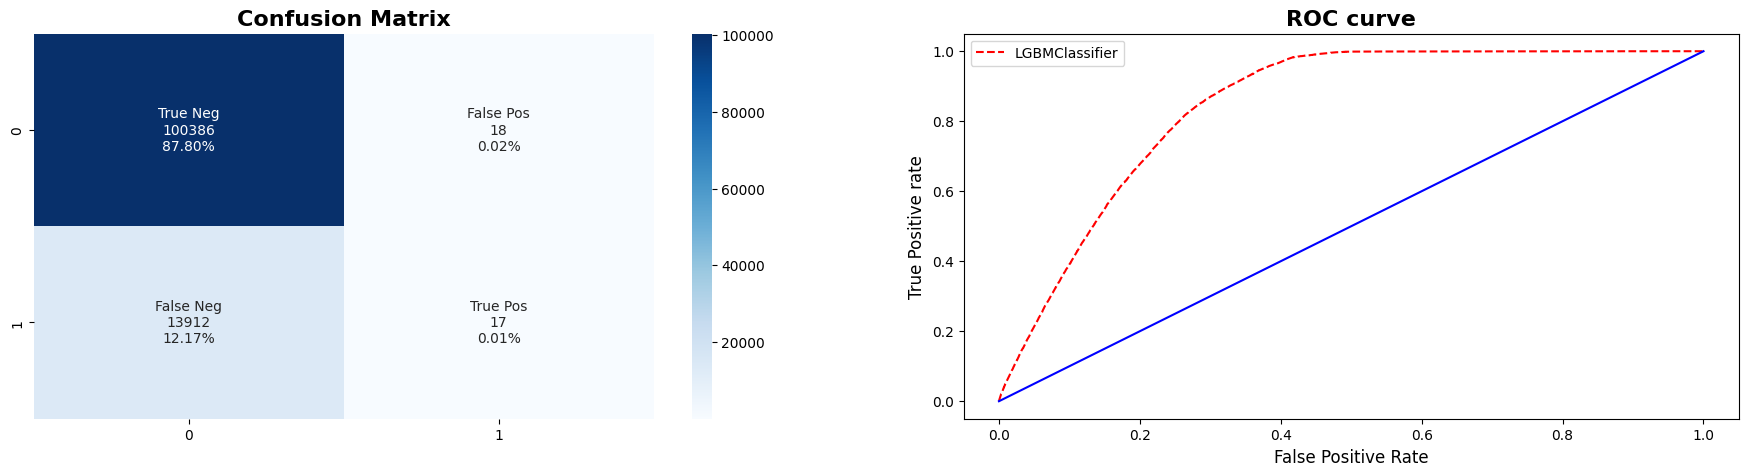

Start Parameter Tuning process...
[LightGBM] [Warning] Unknown parameter: max_depths
[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250
**************************************************
Best Score for LGBMClassifier : 0.5 
---
Best Parameters for LGBMClassifier : {'n_estimators': 100, 'min_data_in_leaf': 250, 'max_depths': 3.0, 'learning_rate': 0.001}
--------------------------------------------------
Elapsed Time: 00:03:59


Evaluation of LGBMClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.391139



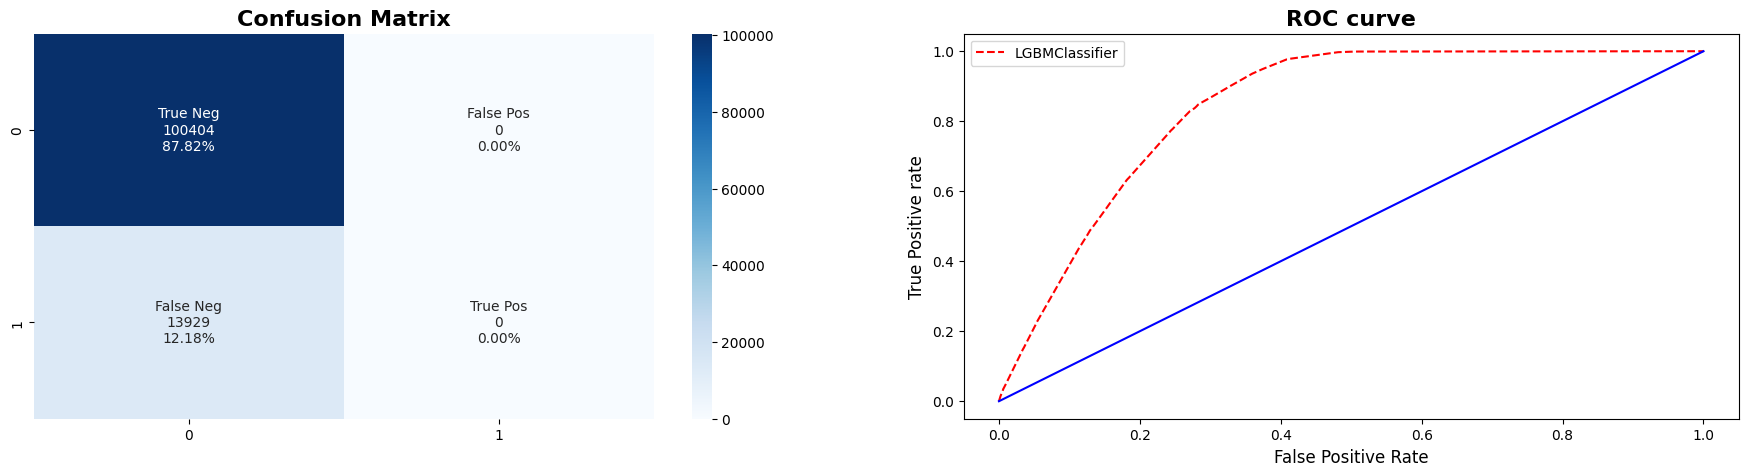

In [ ]:
parameters_lightgbm = {
    'max_depths': np.linspace(1, 32, 32, endpoint=True),
    'min_data_in_leaf':[100, 200, 250, 300],
    'n_estimators':[50,100, 120,150,200],
    'learning_rate':[.001,0.01,.1]
}

ml_algorithm_implementation(data_df, lgb.LGBMClassifier(), parameters_lightgbm, Tuning_Method, False, hpm_scr='balanced_accuracy')

In [ ]:
all_df0  = create_Matrics_df(all_metrics_dict_list )
all_df0

,Model_Name,HyperParameter_scoring,Accuracy_Score,Precision,Recall,F1_Score,ROC_AUC_Score,Log_Loss
0,BeforeTuning_LGBMClassifier,BeforeTuning,0.88,0.49,0.0,0.0,0.5,4.39
1,AfterTuning_LGBMClassifier,balanced_accuracy,0.88,0.00,0.0,0.0,0.5,4.39


## Conclusion: For LightGBM Classifier ther is no change after apply scoring technique balanced_accuracy in Hyperparameter tuning.

################################################################
     <<<<=== ML Model: BaggingClassifier ===>>>>

     <<<<=== Tuning Model: Halving_Randomized_Search_CV ===>>>>
****************************************************************

Evaluation of BaggingClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.853358   0.301136  0.154211  0.203969       0.552281  5.285507



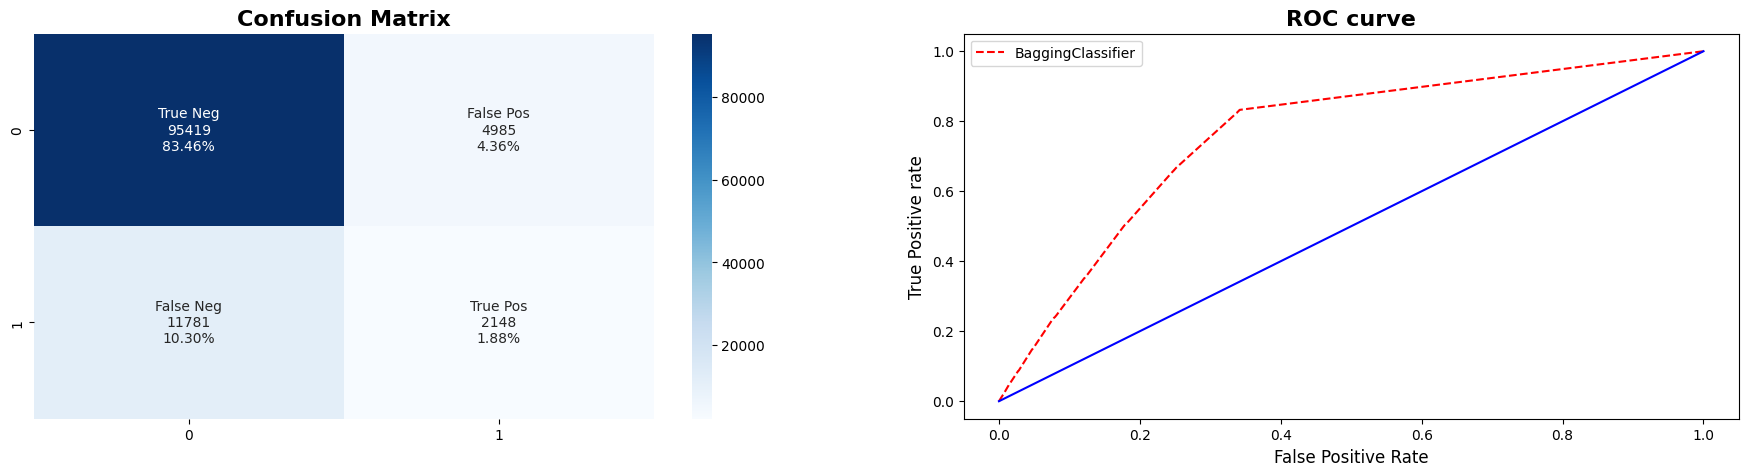

Start Parameter Tuning process...
**************************************************
Best Score for BaggingClassifier : 0.6818181818181819 
---
Best Parameters for BaggingClassifier : {'random_state': 26, 'n_estimators': 200}
--------------------------------------------------
Elapsed Time: 00:04:27


Evaluation of BaggingClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.855737   0.312637  0.153636  0.206027       0.553388  5.199759



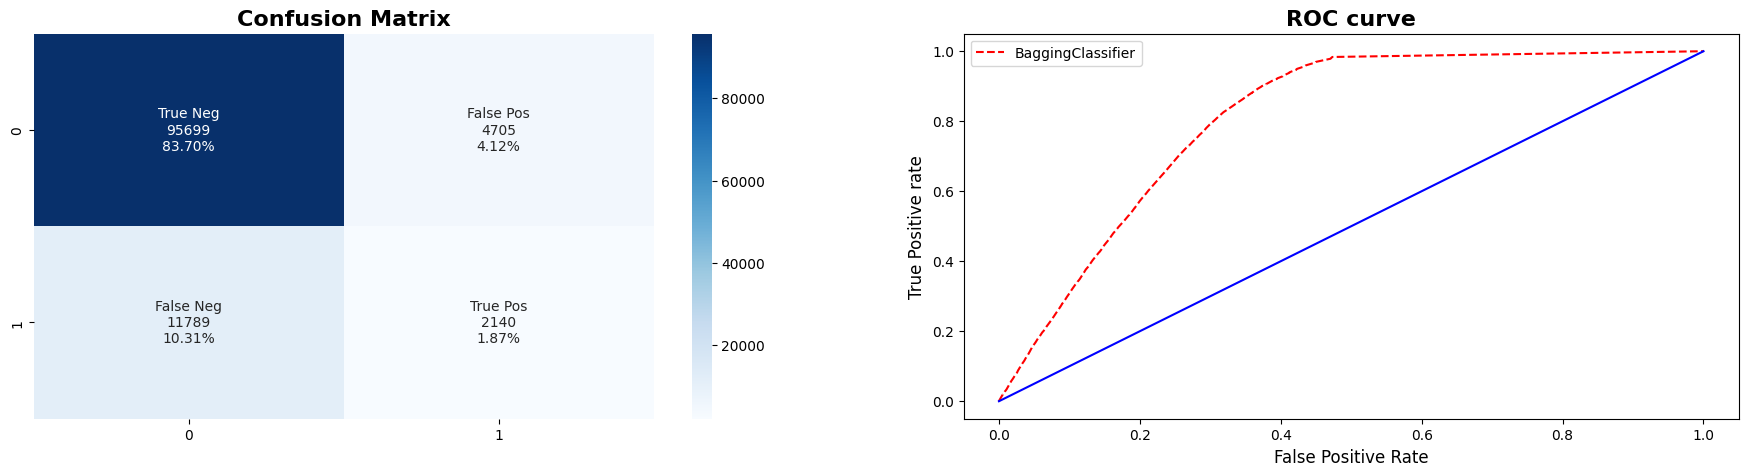

In [ ]:
parameters_bagging = {'n_estimators':[10, 100, 200, 400], 
                      'random_state':[26]}

ml_algorithm_implementation(data_df, BaggingClassifier(), parameters_bagging, Tuning_Method, False, hpm_scr='balanced_accuracy')

################################################################
     <<<<=== ML Model: BaggingClassifier ===>>>>

     <<<<=== Tuning Model: Halving_Randomized_Search_CV ===>>>>
****************************************************************

Evaluation of BaggingClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision   Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.852317   0.295856  0.15378  0.202371       0.551503  5.323022



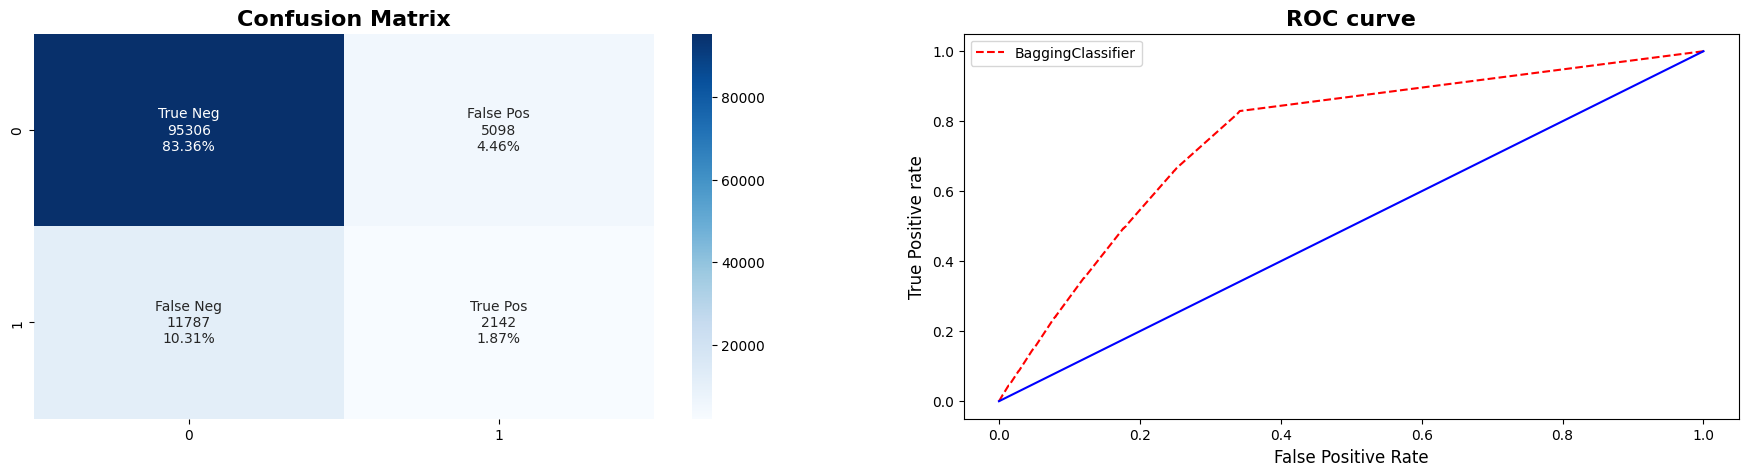

Start Parameter Tuning process...
**************************************************
Best Score for BaggingClassifier : 0.0 
---
Best Parameters for BaggingClassifier : {'random_state': 26, 'n_estimators': 200}
--------------------------------------------------
Elapsed Time: 00:05:01


Evaluation of BaggingClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.855737   0.312637  0.153636  0.206027       0.553388  5.199759



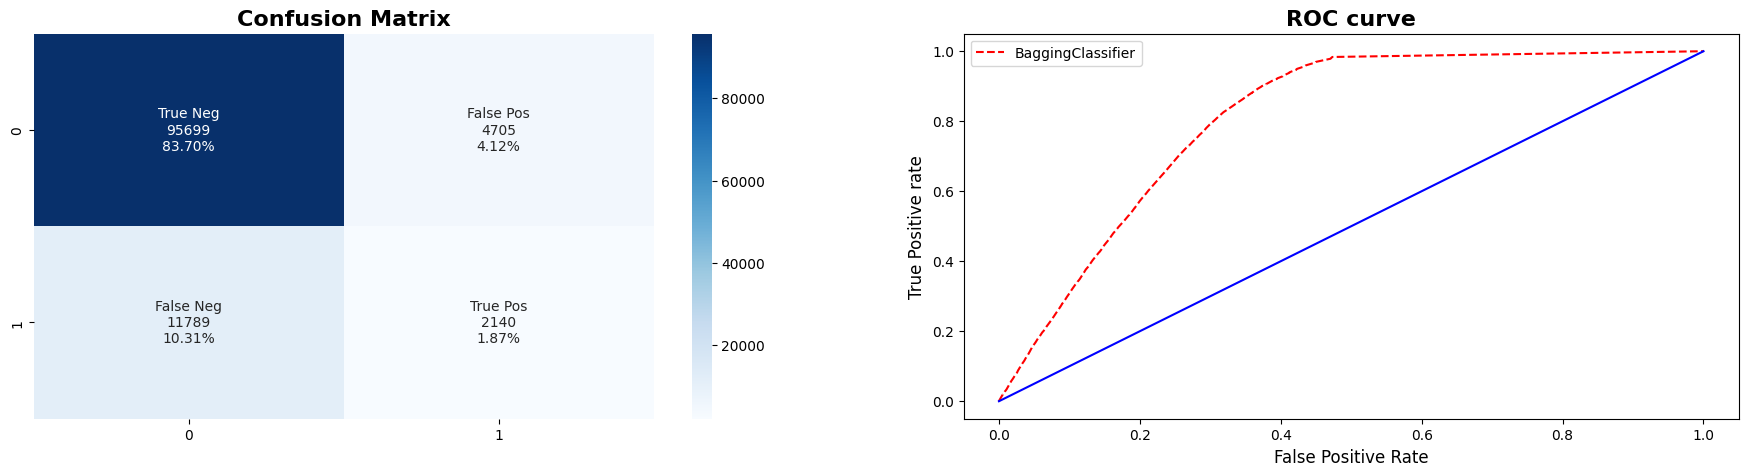

In [ ]:
parameters_bagging = {'n_estimators':[10, 100, 200, 400], 
                      'random_state':[26]}

ml_algorithm_implementation(data_df, BaggingClassifier(), parameters_bagging, Tuning_Method, False, hpm_scr='precision')

################################################################
     <<<<=== ML Model: BaggingClassifier ===>>>>

     <<<<=== Tuning Model: Halving_Randomized_Search_CV ===>>>>
****************************************************************

Evaluation of BaggingClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.853236   0.298174  0.151195  0.200648       0.550912  5.289921



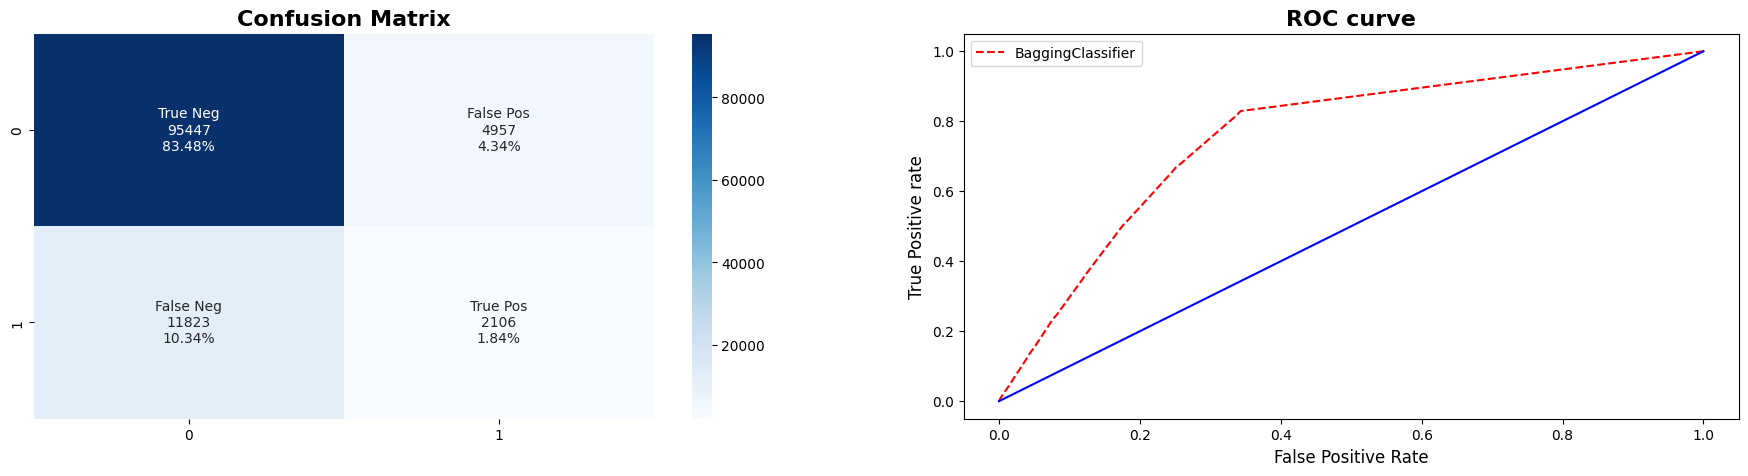

Start Parameter Tuning process...
**************************************************
Best Score for BaggingClassifier : 0.16666666666666666 
---
Best Parameters for BaggingClassifier : {'random_state': 26, 'n_estimators': 400}
--------------------------------------------------
Elapsed Time: 00:09:15


Evaluation of BaggingClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.855746   0.312463  0.153349  0.205731       0.553269  5.199444



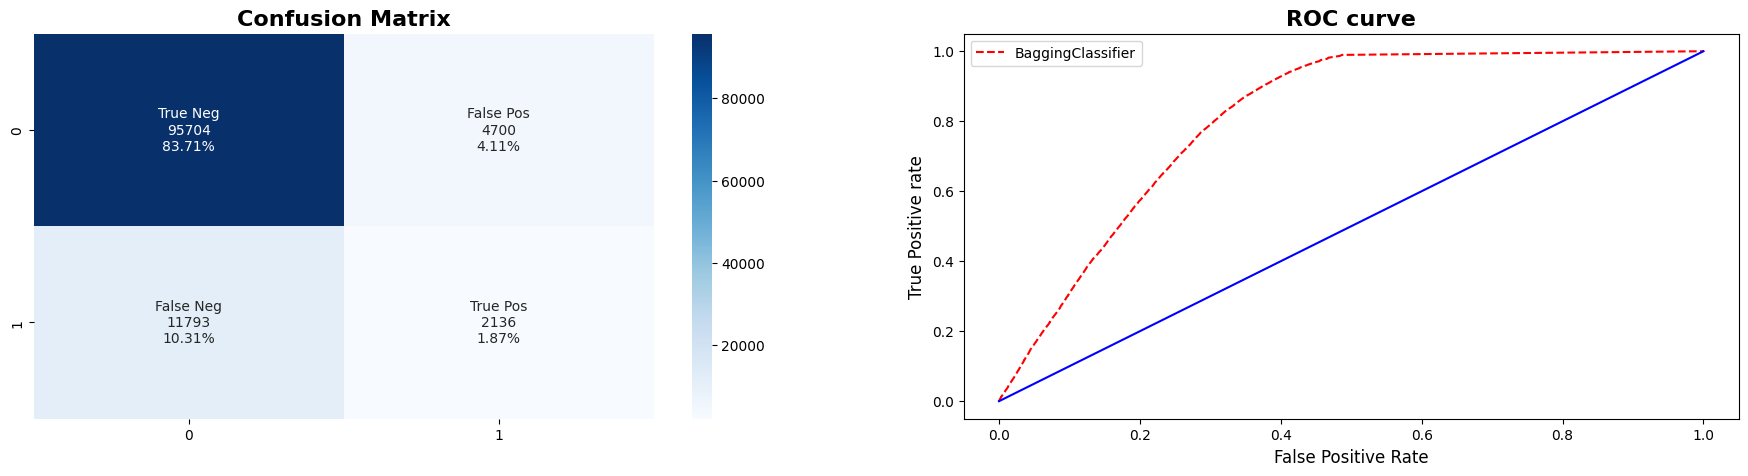

In [ ]:
parameters_bagging = {'n_estimators':[10, 100, 200, 400], 
                      'random_state':[26]}

ml_algorithm_implementation(data_df, BaggingClassifier(), parameters_bagging, Tuning_Method, False, hpm_scr='recall')

################################################################
     <<<<=== ML Model: BaggingClassifier ===>>>>

     <<<<=== Tuning Model: Halving_Randomized_Search_CV ===>>>>
****************************************************************

Evaluation of BaggingClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.853594   0.303606  0.155934  0.206043       0.553157  5.276995



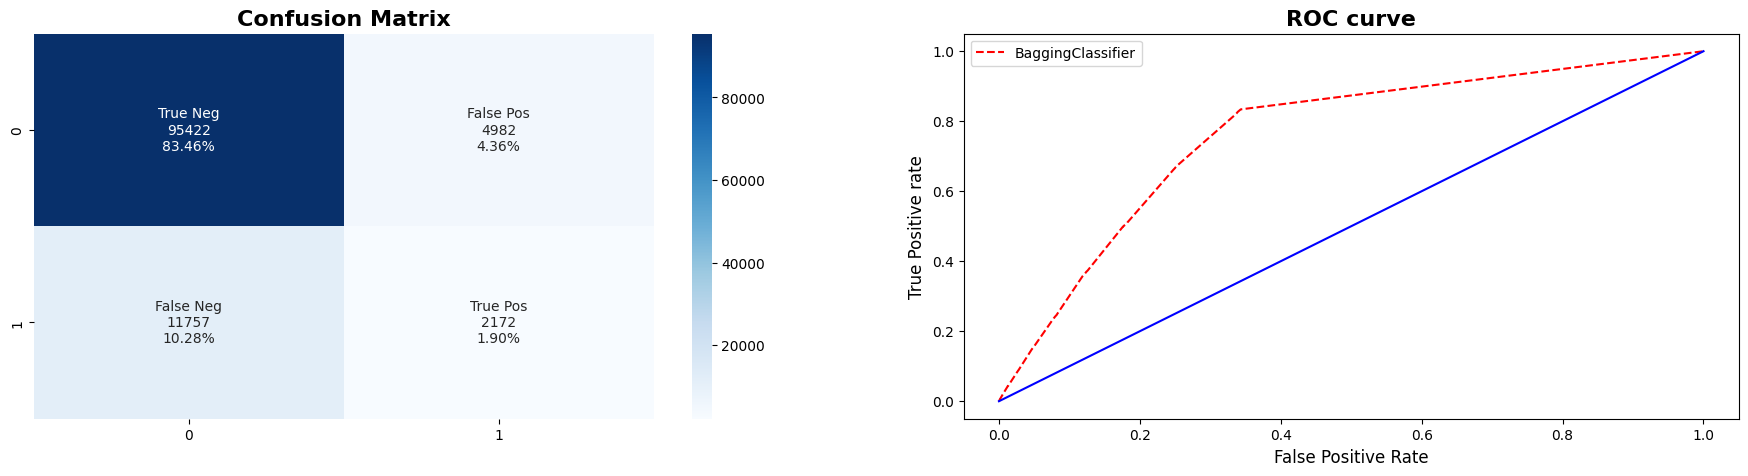

Start Parameter Tuning process...
**************************************************
Best Score for BaggingClassifier : 0.13333333333333333 
---
Best Parameters for BaggingClassifier : {'random_state': 26, 'n_estimators': 200}
--------------------------------------------------
Elapsed Time: 00:04:17


Evaluation of BaggingClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.855737   0.312637  0.153636  0.206027       0.553388  5.199759



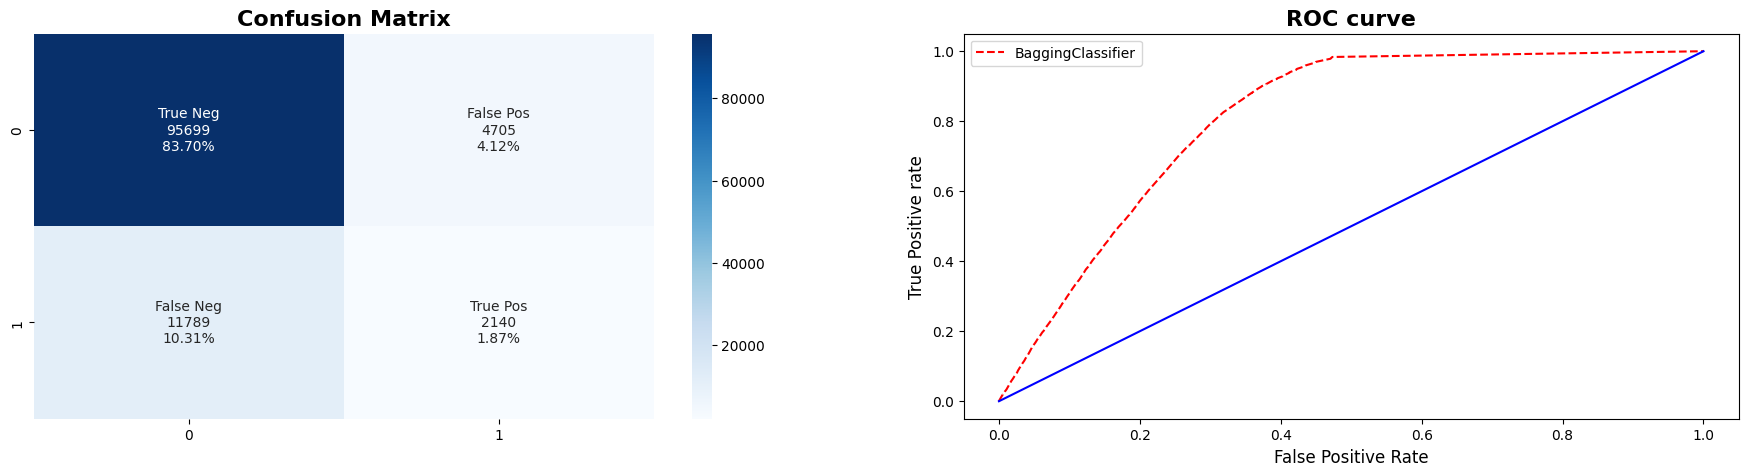

In [ ]:
parameters_bagging = {'n_estimators':[10, 100, 200, 400], 
                      'random_state':[26]}

ml_algorithm_implementation(data_df, BaggingClassifier(), parameters_bagging, Tuning_Method, False, hpm_scr='f1')

################################################################
     <<<<=== ML Model: BaggingClassifier ===>>>>

     <<<<=== Tuning Model: Halving_Randomized_Search_CV ===>>>>
****************************************************************

Evaluation of BaggingClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.853183   0.298774  0.152272  0.201731       0.551346  5.291812



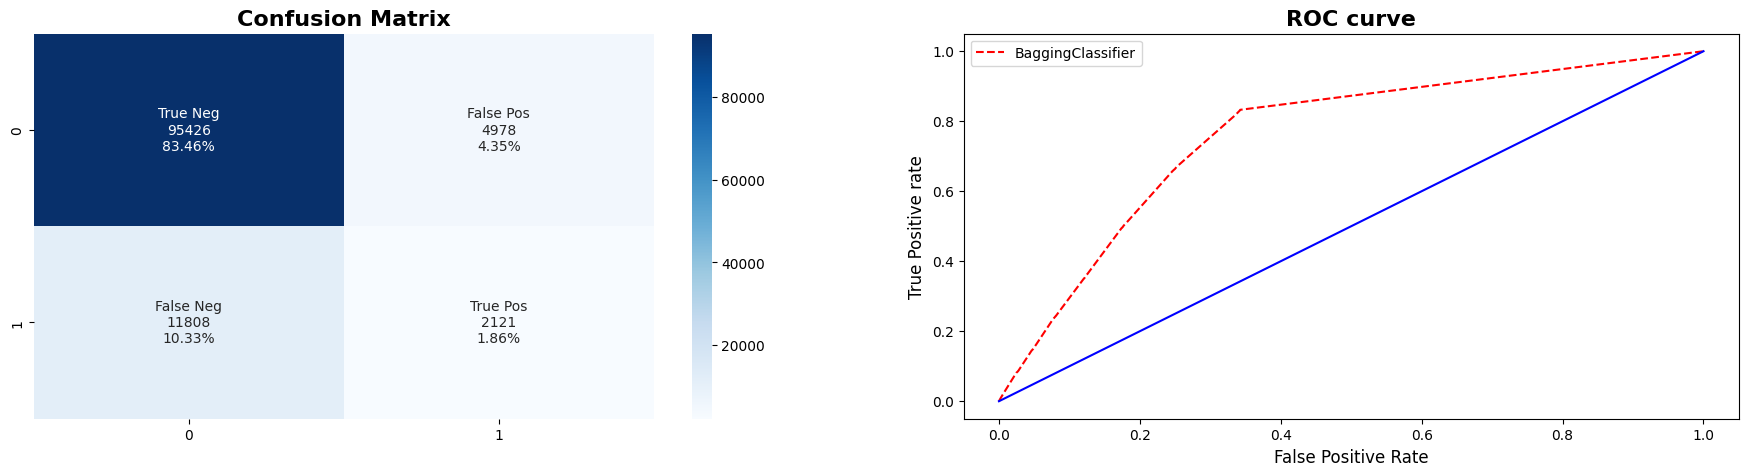

Start Parameter Tuning process...
**************************************************
Best Score for BaggingClassifier : 0.6694086238614438 
---
Best Parameters for BaggingClassifier : {'random_state': 26, 'n_estimators': 200}
--------------------------------------------------
Elapsed Time: 00:04:13


Evaluation of BaggingClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.855737   0.312637  0.153636  0.206027       0.553388  5.199759



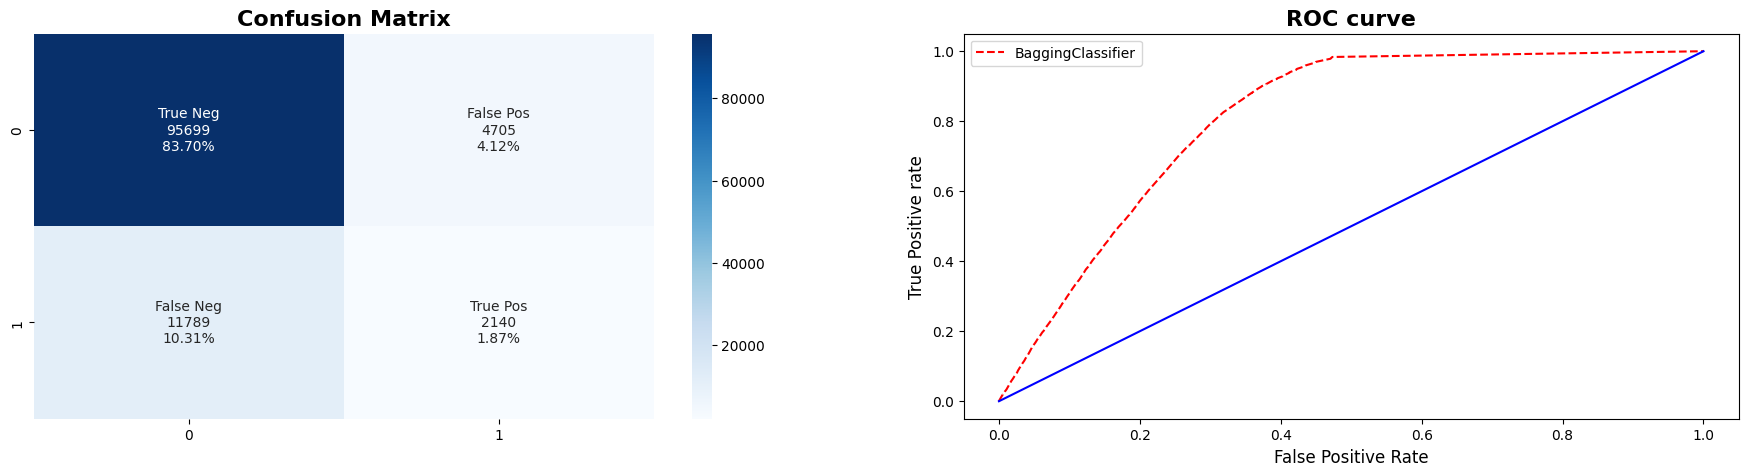

In [ ]:
parameters_bagging = {'n_estimators':[10, 100, 200, 400], 
                      'random_state':[26]}

ml_algorithm_implementation(data_df, BaggingClassifier(), parameters_bagging, Tuning_Method, False, hpm_scr='f1_macro')

In [ ]:
all_df0  = create_Matrics_df(all_metrics_dict_list )
all_df0 = all_df0.iloc[2:,:]
all_df0[~all_df0['HyperParameter_scoring'].isin(['BeforeTuning'])]

,Model_Name,HyperParameter_scoring,Accuracy_Score,Precision,Recall,F1_Score,ROC_AUC_Score,Log_Loss
3,AfterTuning_BaggingClassifier,balanced_accuracy,0.86,0.31,0.15,0.21,0.55,5.2
5,AfterTuning_BaggingClassifier,precision,0.86,0.31,0.15,0.21,0.55,5.2
7,AfterTuning_BaggingClassifier,recall,0.86,0.31,0.15,0.21,0.55,5.2
9,AfterTuning_BaggingClassifier,f1,0.86,0.31,0.15,0.21,0.55,5.2
11,AfterTuning_BaggingClassifier,f1_macro,0.86,0.31,0.15,0.21,0.55,5.2


## Conclusion: After apply other scoring method for HalvingRandomizedSearchCV Hyperparameter technique there is no change in parameters as well as score, So we can conclude here scoring method in HyperParameter Tuning not effect on score....

#### **Comparison Between Different Tuning Techniques (Time):**

GridSearchCV:

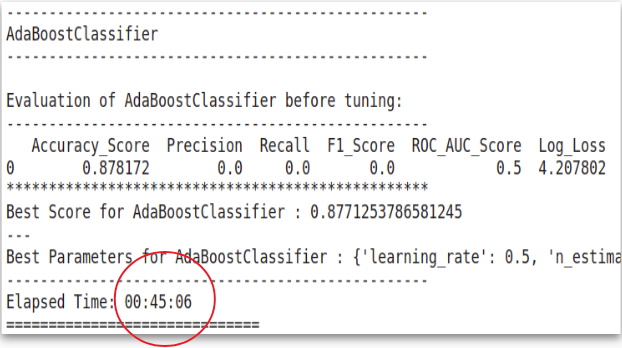



RandomizedSearchCV:

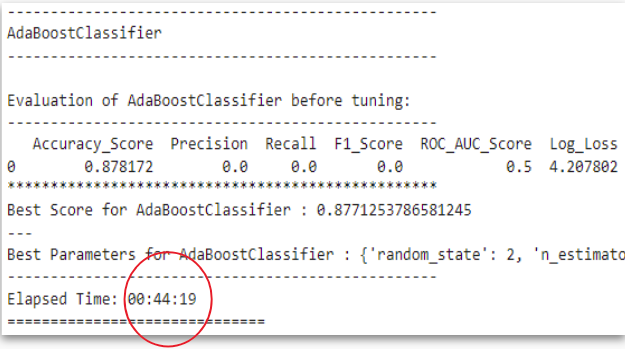


HalvingSearchCV:

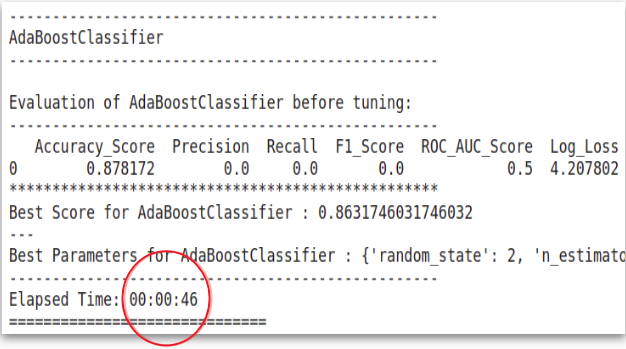


#### **Plots:**

At the end of every model's hyper-parameter tuning, there is one **ROC Curve** which shows the ROC Scores.


**Parallel Coordinates Plot** which shows all the combinations of hyper-parameters used for tuning the model to get the best parameters.

In [ ]:
def plot_confusion_matrix_and_roc_curves(model, X_test, y_test, y_pred):

    fig, axes = plt.subplots(1,2, figsize=(22,5))

    cm = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, ax = axes[0], annot=labels, fmt='',cmap='Blues')
    axes[0].set_title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight':'bold'})

    # predict probabilities
    pred_proba = model.predict_proba(X_test)

    # roc curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

    plt.subplot(1, 2, 2)
    # plot roc curves
    plt.plot(fpr, tpr,linestyle='--',color='red', label = type(model).__name__)

    plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
    # title
    plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
    # x label
    plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
    # y label
    plt.ylabel('True Positive rate', fontdict={'fontsize': 12})

    plt.legend(loc='best')
    plt.show()


def visualization(results_df, parameters):    

    def shorten_param(param_name):
        if "__" in param_name:
            return param_name.rsplit("__", 1)[1]
        return param_name

    column_results = [f"param_{name}" for name in parameters.keys()]
    column_results += ["mean_test_score", "std_test_score", "rank_test_score"]

    results_df = results_df[column_results].sort_values("mean_test_score", ascending=False)
    results_df = results_df.rename(shorten_param, axis=1)

    for col in results_df.columns:
        if col == 'param_random_state':
            continue
        try:
            results_df[col] = results_df[col].astype(np.float64)
        except:
            continue

    fig = px.parallel_coordinates(
    results_df,
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Hyper Parameter Tuning',)
    fig.show()


def evaluation_metrics(name, independent_feature_length , y_pred, y_test):

    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    metrics_dict['Precision'] = [precision_score(y_test,y_pred)]      #Precision
    metrics_dict['Recall'] = [recall_score(y_test,y_pred)]            #Recall
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred)]              #F1 Score
    metrics_dict['ROC_AUC_Score'] = [roc_auc_score(y_test, y_pred)]   #ROC AUC Score
    metrics_dict['Log_Loss'] = [log_loss(y_test, y_pred)]             #Log Loss

    metrics_df = pd.DataFrame(metrics_dict)

    print(metrics_df)


def hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model):

    if tuning_model == 'Halving_Randomized_Search_CV':
        tuned_model = HalvingRandomSearchCV(model, param_distributions = parameters, scoring = "accuracy", n_jobs=-1, factor=3, cv = 5 )
    
    elif tuning_model == 'Randomized_Search_CV':
        tuned_model = RandomizedSearchCV(model, param_distributions = parameters, scoring = 'accuracy', cv = 3, n_iter = 50, n_jobs=-1)

    else:
        tuned_mode = GridSearchCV(model, param_grid = parameters, scoring = 'accuracy', n_jobs=-1, cv = 3)

    
    start_time = time.time() 
    
    tuned_model.fit(x_train, y_train)
    
    stop_time = time.time()

    print('*****'*10+f'\nBest Score for {type(model).__name__} : {tuned_model.best_score_}','\n---')
    print(f'Best Parameters for {type(model).__name__} : {tuned_model.best_params_}\n'+'-----'*10)

    print('Elapsed Time:',time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    print('======'*5)

    return tuned_model


def perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model):
    print('-----'*10+f'\n{type(model).__name__}\n'+'-----'*10)

    model.fit(x_train, y_train)
    untuned_pred = model.predict(x_test)

    # Evaluation Metrics before tuning
    print(f'\nEvaluation of {type(model).__name__} before tuning:\n'+'-----'*10)
    evaluation_metrics(type(model).__name__, len(list(x_train.columns)), untuned_pred, y_test)

    print()
    plot_confusion_matrix_and_roc_curves(model, x_test, y_test, untuned_pred)

    # Hyper-parameter tuning
    tuned_model = hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model)
    print()
    tuned_pred = tuned_model.predict(x_test)
  
    # Evaluation Metrics after tuning
    print(f'\nEvaluation of {type(model).__name__} after tuning:\n'+'-----'*10)
    evaluation_metrics(type(model).__name__,len(list(x_train.columns)), tuned_pred, y_test)

    print()
    plot_confusion_matrix_and_roc_curves(tuned_model.best_estimator_, x_test, y_test, tuned_pred)
    visualization(pd.DataFrame(tuned_model.cv_results_), parameters)


def ml_algorithm_implementation(df, model, parameters, tuning_model, feature_importance = False):

    if feature_importance == False:
        print('########'*8+'\n     <<<<=== '+f'Tuning Model: {tuning_model}'+' ===>>>>\n'+'********'*8)

    x = data_df.iloc[:,1:]
    y = data_df['Response']

    # Train Test Split             
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=57)

    if feature_importance == True:
        model.fit(x_train, y_train)
        return x_train, y_train, model

    perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model)

In [ ]:
parameters_decision_tree = {"splitter":["best","random"],
            "max_depth" : [None,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.0, 0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,30,40,50,60], 
           'random_state':[23]}

ml_algorithm_implementation(data_df, DecisionTreeClassifier(), parameters_decision_tree, Tuning_Method, False)